In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
#from api_key import eia_api_key
eia_api_key = "7GAy2uMZHd2UXwGYyaoKyDeWSKxo9Mqvg7ehleq5"

In [2]:

capacity_api_call = requests.get(f'https://api.eia.gov/v2/electricity/state-electricity-profiles/capability/data/?api_key={eia_api_key}&frequency=annual&data[0]=capability&facets[producertypeid][]=TOT&start=2010&end=2020&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000').json()

key_stats_api_call = requests.get(f'https://api.eia.gov/v2/electricity/state-electricity-profiles/summary/data/?api_key={eia_api_key}&frequency=annual&data[0]=average-retail-price&data[1]=average-retail-price-rank&data[2]=capacity-elec-utilities&data[3]=capacity-elect-utilities-rank&data[4]=capacity-ipp&data[5]=capacity-ipp-rank&data[6]=carbon-dioxide&data[7]=carbon-dioxide-lbs&data[8]=carbon-dioxide-rank&data[9]=carbon-dioxide-rank-lbs&data[10]=direct-use&data[11]=direct-use-rank&data[12]=eop-sales&data[13]=eop-sales-rank&data[14]=fsp-sales-rank&data[15]=fsp-service-provider-sales&data[16]=generation-elect-utils&data[17]=generation-elect-utils-rank&data[18]=generation-ipp&data[19]=generation-ipp-rank&data[20]=net-generation&data[21]=net-generation-rank&data[22]=net-summer-capacity&data[23]=net-summer-capacity-rank&data[24]=nitrogen-oxide&data[25]=nitrogen-oxide-lbs&data[26]=nitrogen-oxide-rank&data[27]=nitrogen-oxide-rank-lbs&data[28]=prime-source&data[29]=sulfer-dioxide&data[30]=sulfer-dioxide-lbs&data[31]=sulfer-dioxide-rank&data[32]=sulfer-dioxide-rank-lbs&data[33]=total-retail-sales&data[34]=total-retail-sales-rank&start=2008&end=2018&sort[0][column]=average-retail-price&sort[0][direction]=asc&offset=0&length=5000').json()


In [3]:
state_key_stats = []

for x in key_stats_api_call['response']['data']:
    key_stats_energy_source = x['prime-source']
    key_stats_state = x['stateDescription']
    key_stats_period = x['period']
    key_stats_avg_price = x['average-retail-price']
    key_stats_carbon_per_mw = x['carbon-dioxide-lbs']
    key_stats_total_carbon = x['carbon-dioxide']
    
    
    state_key_stats.append({"State": key_stats_state,
                            'Year': key_stats_period,
                            'Energy Source': key_stats_energy_source,
                            'Average Price (Cents per KW Hour)': key_stats_avg_price,
                            'CO2 Emissions (lbs per MW Hour)': key_stats_carbon_per_mw,
                            'Total CO2 Emissions (thousand metric tons)': key_stats_total_carbon
        })



In [4]:
df_state_key_stats = pd.DataFrame(state_key_stats)



#df_state_key_stats.head()

In [5]:
df_clean_state_key_stats = df_state_key_stats.drop(df_state_key_stats[df_state_key_stats['State'].str.contains('District of Columbia') | df_state_key_stats['State'].str.contains('United States')].index,inplace=False)
df_clean_state_key_stats

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Wyoming,2009,Coal,6.08,2136,44684
4,Wyoming,2010,Coal,6.20,2090,45703
...,...,...,...,...,...,...
567,Hawaii,2008,Petroleum,29.20,1750,9048
568,Hawaii,2011,Petroleum,31.59,1662,8100
569,Hawaii,2013,Petroleum,33.26,1592,7428
570,Hawaii,2014,Petroleum,33.43,1606,7448


In [6]:
df_2008_state_key_stats = df_clean_state_key_stats.loc[df_clean_state_key_stats['Year'] == 2008]
df_2018_state_key_stats = df_clean_state_key_stats.loc[df_clean_state_key_stats['Year'] == 2018]


df_2008_state_key_stats.reset_index(drop=True, inplace=True)
df_2018_state_key_stats.reset_index(drop=True, inplace=True)


In [7]:
df_2008_max_average_price = df_2008_state_key_stats.loc[(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].idxmax())]
print(df_2008_max_average_price)
df_2018_max_average_price = df_2018_state_key_stats.loc[(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].idxmax())]
print(df_2018_max_average_price)

df_2008_min_average_price = df_2008_state_key_stats.loc[(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].idxmin())]
print(df_2008_min_average_price)
df_2018_min_average_price = df_2018_state_key_stats.loc[(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].idxmin())]
print(df_2018_min_average_price)

print(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].median())
df_2008_median_average_price = df_2008_state_key_stats.loc[24:25, :]
df_2008_median_average_price
print(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].median())
df_2018_median_average_price = df_2018_state_key_stats.loc[24:25, :]
df_2018_median_average_price

print(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].mean())
df_2008_mean_average_price = df_2008_state_key_stats.loc[34, :]
print(df_2008_mean_average_price)
print(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].mean())
df_2018_mean_average_price = df_2018_state_key_stats.loc[37, :]
print(df_2018_mean_average_price)

State                                            Hawaii
Year                                               2008
Energy Source                                 Petroleum
Average Price (Cents per KW Hour)                  29.2
CO2 Emissions (lbs per MW Hour)                    1750
Total CO2 Emissions (thousand metric tons)         9048
Name: 49, dtype: object
State                                            Hawaii
Year                                               2018
Energy Source                                 Petroleum
Average Price (Cents per KW Hour)                 29.18
CO2 Emissions (lbs per MW Hour)                    1616
Total CO2 Emissions (thousand metric tons)         7197
Name: 49, dtype: object
State                                         West Virginia
Year                                                   2008
Energy Source                                          Coal
Average Price (Cents per KW Hour)                      5.61
CO2 Emissions (lbs per MW Hour)         

In [8]:
df_2008_max_co2_emissions = df_2008_state_key_stats.loc[(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmax())]
print(df_2008_max_co2_emissions)
df_2018_max_co2_emissions = df_2018_state_key_stats.loc[(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmax())]
print(df_2018_max_co2_emissions)

df_2008_min_co2_emissions = df_2008_state_key_stats.loc[(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmin())]
print(df_2008_min_co2_emissions)
df_2018_min_co2_emissions = df_2018_state_key_stats.loc[(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmin())]
df_2018_min_co2_emissions

print(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].median())
df_2008_median_co2_emissions = df_2008_state_key_stats.loc[[19, 40], :]
df_2008_median_co2_emissions
print(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].median())
df_2018_median_co2_emissions = df_2018_state_key_stats.loc[[36, 22], :]
df_2018_median_co2_emissions

print(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].mean())
df_2008_mean_co2_emissions = df_2008_state_key_stats.loc[19, :]
print(df_2008_mean_co2_emissions)
print(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].mean())
df_2018_mean_co2_emissions = df_2018_state_key_stats.loc[35, :]
print(df_2018_mean_co2_emissions)

State                                         Wyoming
Year                                             2008
Energy Source                                    Coal
Average Price (Cents per KW Hour)                5.67
CO2 Emissions (lbs per MW Hour)                  2216
Total CO2 Emissions (thousand metric tons)      46837
Name: 1, dtype: object
State                                         Wyoming
Year                                             2018
Energy Source                                    Coal
Average Price (Cents per KW Hour)                8.09
CO2 Emissions (lbs per MW Hour)                  2100
Total CO2 Emissions (thousand metric tons)      44014
Name: 3, dtype: object
State                                         Vermont
Year                                             2008
Energy Source                                 Nuclear
Average Price (Cents per KW Hour)               12.33
CO2 Emissions (lbs per MW Hour)                     2
Total CO2 Emissions (thousand metric

In [13]:
key_stats_combined = {'Maximums': [df_2008_max_average_price, df_2018_max_average_price, df_2008_max_co2_emissions, df_2018_max_co2_emissions],
                      'Minimums': [df_2008_min_average_price, df_2018_min_average_price, df_2008_min_co2_emissions, df_2018_min_co2_emissions],
                      'Medians': [df_2008_median_average_price, df_2018_median_average_price, df_2008_median_co2_emissions, df_2018_median_co2_emissions],
                      'Averages': [df_2008_mean_average_price, df_2018_mean_average_price, df_2008_mean_co2_emissions, df_2018_mean_co2_emissions]}
df_key_stats_combined = pd.DataFrame(key_stats_combined)
df_key_stats_combined.head(50)

,Maximums,Minimums,Medians,Averages
0,State ...,State ...,State Year Energy Source Average Pric...,State ...
1,State ...,State ...,State Year Energy Source Averag...,State ...
2,State ...,State ...,State Year Energy Source Averag...,State ...
3,State ...,State ...,State Year Energy Source Average Price...,State ...


In [14]:
df_combined_state_key_stats = df_2008_state_key_stats.merge(df_2018_state_key_stats, how='outer')

df_combined_state_key_stats

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Kentucky,2008,Coal,6.26,2114,94028
4,Utah,2008,Coal,6.49,1860,39381
...,...,...,...,...,...,...
95,Rhode Island,2018,Natural Gas,18.10,879,3348
96,Connecticut,2018,Natural Gas,18.41,535,9591
97,Massachusetts,2018,Natural Gas,18.50,808,9976
98,Alaska,2018,Natural Gas,19.36,1194,3390


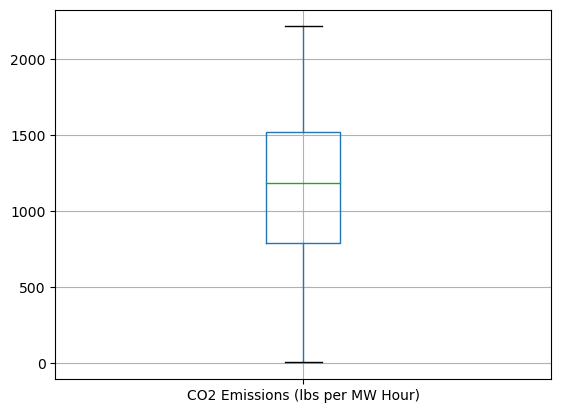

In [15]:
df_combined_state_key_stats.boxplot(column=['CO2 Emissions (lbs per MW Hour)'])
plt.show()

In [16]:
co2_quartiles = df_combined_state_key_stats['CO2 Emissions (lbs per MW Hour)'].quantile([.25,.5,.75])
co2_lowerq = co2_quartiles[0.25]
co2_upperq = co2_quartiles[0.75]
co2_iqr = co2_upperq-co2_lowerq
co2_lower_bound = co2_lowerq - (1.5*co2_iqr)
co2_upper_bound = co2_upperq + (1.5*co2_iqr)

print(f"The combined year median of Average Price (Cents per KW Hour) is: {co2_quartiles[0.5]}")
print(f"Values below {co2_lower_bound} could be outliers.")
print(f"Values above {co2_upper_bound} could be outliers.")


The combined year median of Average Price (Cents per KW Hour) is: 1186.0
Values below -308.0 could be outliers.
Values above 2618.0 could be outliers.


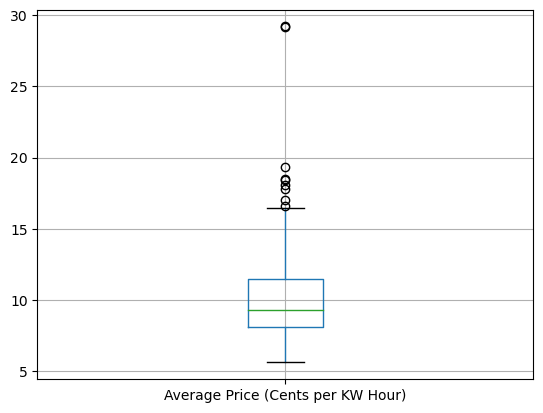

In [17]:
df_combined_state_key_stats.boxplot(column=['Average Price (Cents per KW Hour)'])
plt.show()

In [18]:
price_quartiles = df_combined_state_key_stats['Average Price (Cents per KW Hour)'].quantile([.25,.5,.75])
price_lowerq = price_quartiles[0.25]
price_upperq = price_quartiles[0.75]
price_iqr = price_upperq-price_lowerq
price_lower_bound = price_lowerq - (1.5*price_iqr)
price_upper_bound = price_upperq + (1.5*price_iqr)

print(f"The combined year median of Average Price (Cents per KW Hour) is: {price_quartiles[0.5]}")
print(f"Values below {price_lower_bound} could be outliers.")
print(f"Values above {price_upper_bound} could be outliers.")

The combined year median of Average Price (Cents per KW Hour) is: 9.29
Values below 3.0612499999999985 could be outliers.
Values above 16.47125 could be outliers.


In [19]:
df_2008_state_key_stats.sort_values(by='CO2 Emissions (lbs per MW Hour)')


,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
37,Vermont,2008,Nuclear,12.33,2,7
2,Idaho,2008,Hydroelectric,5.69,187,1017
5,Washington,2008,Hydroelectric,6.55,272,13686
12,Oregon,2008,Hydroelectric,7.24,405,10821
43,New Hampshire,2008,Nuclear,14.63,652,6782
39,California,2008,Natural Gas,12.49,662,62549
48,Connecticut,2008,Nuclear,17.80,684,9451
41,Maine,2008,Natural Gas,13.80,684,5314
42,New Jersey,2008,Nuclear,14.43,694,20097
47,New York,2008,Natural Gas,16.47,739,47157


In [20]:
df_2008_state_key_stats.sort_values(by='Average Price (Cents per KW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Kentucky,2008,Coal,6.26,2114,94028
4,Utah,2008,Coal,6.49,1860,39381
5,Washington,2008,Hydroelectric,6.55,272,13686
6,Nebraska,2008,Coal,6.58,1526,22460
7,North Dakota,2008,Coal,6.69,2210,32887
8,Missouri,2008,Coal,6.84,1877,77650
9,Iowa,2008,Coal,6.89,1912,46137


In [21]:
df_2018_state_key_stats.sort_values(by='Average Price (Cents per KW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,Louisiana,2018,Natural Gas,7.71,1094,50770
1,Arkansas,2018,Coal,7.78,1241,38349
2,Washington,2018,Hydroelectric,8.00,201,10661
3,Wyoming,2018,Coal,8.09,2100,44014
4,Oklahoma,2018,Natural Gas,8.09,880,34476
5,Idaho,2018,Hydroelectric,8.17,214,1766
6,Utah,2018,Coal,8.21,1595,28544
7,Texas,2018,Natural Gas,8.48,1060,230076
8,Kentucky,2018,Coal,8.52,1850,66267
9,Nevada,2018,Natural Gas,8.67,777,14005


In [22]:
df_2018_state_key_stats.sort_values(by='CO2 Emissions (lbs per MW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
42,Vermont,2018,Hydroelectric,15.13,10,10
2,Washington,2018,Hydroelectric,8.00,201,10661
5,Idaho,2018,Hydroelectric,8.17,214,1766
44,New Hampshire,2018,Nuclear,17.01,282,2191
12,Oregon,2018,Hydroelectric,8.85,302,8800
40,Maine,2018,Hydroelectric,13.44,429,2202
41,New York,2018,Natural Gas,14.83,464,27936
43,California,2018,Natural Gas,16.58,491,43579
28,South Dakota,2018,Hydroelectric,9.97,509,2921
46,Connecticut,2018,Natural Gas,18.41,535,9591


In [23]:
display(df_state_key_stats.groupby('State').count())

,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
State,,,,,
Alabama,11,11,11,11,11
Alaska,11,11,11,11,11
Arizona,11,11,11,11,11
Arkansas,11,11,11,11,11
California,11,11,11,11,11
Colorado,11,11,11,11,11
Connecticut,11,11,11,11,11
Delaware,11,11,11,11,11
District of Columbia,11,11,11,11,11


In [24]:
state_production_capability = []

for x in capacity_api_call['response']['data']:
    production_capability = x['capability']
    state = x['stateDescription']
    period = x['period']
    energy_source = x['energySourceDescription']
    producer_type = x['producerTypeDescription']
    
    state_production_capability.append({"Production Capability (MW)": production_capability,
                                        'State': state,
                                        'Year': period,
                                        'Energy Source': energy_source,
                                        'Producer Type': producer_type
        })




In [25]:
df_state_production_capability = pd.DataFrame(state_production_capability)

df_state_production_capability.head(50)



,Production Capability (MW),State,Year,Energy Source,Producer Type
0,44442.3,Illinois,2020,All,All sectors
1,66.1,Idaho,2020,Wood,All sectors
2,970.4,Idaho,2020,Wind,All sectors
3,242.0,Idaho,2020,Solar - PV,All sectors
4,242.0,Idaho,2020,Solar,All sectors
5,5.4,Idaho,2020,Petroleum - IC,All sectors
6,5.4,Idaho,2020,Petroleum,All sectors
7,20.2,Idaho,2020,Other Biomass,All sectors
8,14.8,Idaho,2020,Other,All sectors
9,11.7,Idaho,2020,Natural Gas - ST,All sectors


In [26]:
df_agg_production_capability = df_state_production_capability.drop(df_state_production_capability[df_state_production_capability['Energy Source'].str.contains('-')].index,inplace=False)

display(df_agg_production_capability)

,Production Capability (MW),State,Year,Energy Source,Producer Type
0,44442.3,Illinois,2020,All,All sectors
1,66.1,Idaho,2020,Wood,All sectors
2,970.4,Idaho,2020,Wind,All sectors
4,242.0,Idaho,2020,Solar,All sectors
6,5.4,Idaho,2020,Petroleum,All sectors
...,...,...,...,...,...
4991,11.2,New Jersey,2014,Other,All sectors
4992,4110.1,New Jersey,2014,Nuclear,All sectors
4997,11217.0,New Jersey,2014,Natural Gas,All sectors
4998,12.3,New Jersey,2014,Hydroelectric,All sectors


In [27]:
df_agg_production_capability.groupby(['State','Year','Energy Source']).sum()



Production Capability (MW)
State   Year Energy Source                            
Alabama 2014 All                               31953.3
             Coal                              10746.4
             Hydroelectric                      3271.0
             Natural Gas                       12111.2
             Nuclear                            5066.4
...                                                ...
Wyoming 2020 Other                                12.4
             Other Gas                             3.3
             Petroleum                             5.8
             Solar                                92.0
             Wind                               2504.9

[3053 rows x 1 columns]

In [28]:
df_grouped_state = df_state_production_capability.groupby(['State']).count()

display(df_grouped_state)

,Production Capability (MW),Year,Energy Source,Producer Type
State,,,,
Alabama,101,101,101,101
Alaska,89,89,89,89
Arizona,117,117,117,117
Arkansas,95,95,95,95
California,149,149,149,149
Colorado,112,112,112,112
Connecticut,107,107,107,107
Delaware,70,70,70,70
District of Columbia,22,22,22,22
